In [16]:
import meep as mp
import numpy as np
import math
import matplotlib.pyplot as plt

In [17]:
resolution = 500  # pixels/μm

dpml = 1.0  # PML thickness
dsub = 0.5  # substrate thickness
dcaa = 0.06  # air rigion for alpha structure
# alpha structure is that one period = 200nm，sigle cell width = 80nm locate at center
dcab = 0.025 # air rigion for beta structure 
# beta structure is that one period = 200nm，sigle cell width = 150nm locate at center
gp = 0.2  # grating periodicity
gh = 0.6  # grating height
gwa = 0.08 # alpha grating cell width
gwb = 0.15 # beta grating cell width

num_cells = 9  # number of grating unit cells

# air region thickness adjacent to grating
dair = 14 

wvl = 0.532  # center wavelength
fcen = 1 / wvl  # center frequency


glass = mp.Medium(index= 2.6678)

pml_layers = [mp.PML(thickness=dpml, direction = mp.X )]

#symmetries = [mp.Mirror(mp.Y)]

sx = dpml + dsub + gh + dair + dpml
sy = gp*num_cells
cell_size = mp.Vector3(sx, sy)

sources = [
    mp.Source(
        mp.ContinuousSource(frequency = 2), # frequemcy = 2原因是 meep 的 C=1，所以 1/? = 0.5 um，?即是2
        component = mp.Ez,
        center = mp.Vector3(-0.5 * sx + dpml ),
        size = mp.Vector3(y=sy),
    )
]

geometry = [
    mp.Block(
        material=glass,
        size=mp.Vector3(dsub, mp.inf, mp.inf),
        center=mp.Vector3(-0.5 * sx + dpml + dsub/2),
    )
]


In [18]:
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwa, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + gp/2 + (j * 3 * gp),
                #-0.5 * sy + gp/2 ,
            ),
        )
    )

for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwa, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + gp + gp/2  + (j * 3 * gp),
                #-0.5 * sy + gp/2 + gp ,
            ),
        )
    )

for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwb, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + 2*gp + gp/2  + (j * 3 * gp),
                #-0.5 * sy + gp/2 + 2*gp ,
            ),
        )
    )


     block, center = (-7.3,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-0.8,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-0.2,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,0.4,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,1,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,1.6,0)
          size (0.6,0.08,1e+20)
          axes (1,0,

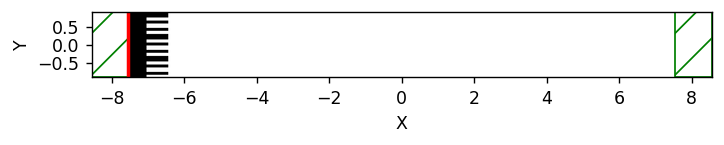

In [19]:
# 設定週期邊界條件
k_point = mp.Vector3()  # Gamma 點表示週期邊界條件
k_points = [k_point]

sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    k_point = mp.Vector3(),
)

%matplotlib inline
plt.figure(dpi = 125)
sim.plot2D()
plt.show()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000785828 s
Working in 2D dimensions.
Computational cell is 17.1 x 1.8 x 0 with resolution 500
     block, center = (-7.3,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-0.8,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-0.2,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,0.4,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,1,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,

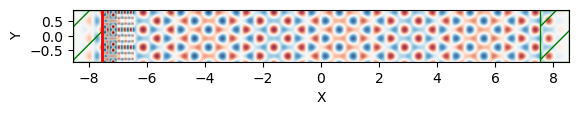

In [20]:
sim.run(until = 100)
plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [22]:

# 取得 Ez 場量在指定位置的振福資訊
amplitude_data = sim.get_array(component=mp.Ez,cmplx = True)

# 計算觀測點的相對座標
x_obs = -0.5 * sx + dpml + dsub + gh + 0.01
y_obs_start = -0.5 * sy + gp/2

# 儲存振福資訊的列表
amplitude_list = []

# 遍歷每個觀測點
for j in range(num_cells):
    y_obs = y_obs_start + (j * gp)
    # 計算觀測點在陣列中的索引位置
    x_index = int(round((x_obs) * sim.resolution))
    y_index = int(round((y_obs) * sim.resolution))
    # 取得振福資訊
    amplitude = np.abs(amplitude_data[x_index, y_index])
    amplitude_list.append(amplitude)
    
   
# 印出觀測點的振福資訊
'''
for j, amplitude in enumerate(amplitude_list):
    print(f"觀測點 {j+1} 的振福資訊: {amplitude/np.max(amplitude_list)}")'''

print(amplitude_list)

[0.02664316802206948, 0.02764490983993126, 0.5625308904368567, 0.020910414066141393, 0.025415664724047708, 0.5747552007127661, 0.03775478971106455, 0.03094068707874085, 0.5749753096360157]


In [21]:
# 取得 Ez 場量在指定位置的相位資訊
phase_data = np.fft.fft(np.array(sim.get_array(component = mp.Ez , cmplx = True)))
# = sim.get_array(component=mp.Ez, cmplx=True)

# 計算觀測點的相對座標
x_obs = -0.5 * sx + dpml + dsub + gh + 0.01
y_obs_start = -0.5 * sy + gp / 2

# 儲存相位資訊的列表
phase_list = []

# 遍歷每個觀測點
for j in range(3):
    y_obs = y_obs_start + j * gp
    # 計算觀測點在陣列中的索引位置
    x_index = int(round((x_obs ) * sim.resolution))
    y_index = int(round((y_obs ) * sim.resolution))
    # 取得相位資訊，加上參考相位
    phase = np.angle(phase_data[x_index, y_index])
    phase_list.append(phase)

print(phase_list)

'''
# 取得 Ez 場量在指定位置的相位資訊
phase_data = np.fft.fft(np.array(sim.get_array(component = mp.Ez , cmplx = True)))
#phase_data = sim.get_array(component = mp.Ez)

# 計算觀測點的相對座標
x_obs = -0.5 * sx + dpml + dsub + gh +0.01
y_obs_start = -0.5 * sy #+ gp/2 

# 儲存相位資訊的列表
phase_list = []

# 遍歷每個觀測點
for j in range(240):
    y_obs = y_obs_start + (j * 0.0025)
    # 計算觀測點在陣列中的索引位置
    x_index = int(round((x_obs / sim.cell_size.x ) * sim.resolution))
    y_index = int(round((y_obs / sim.cell_size.y ) * sim.resolution))
    # 取得相位資訊
    phase = np.angle(phase_data[x_index, y_index])
    phase_list.append(phase)

# 印出觀測點的相位資訊
for j, phase in enumerate(phase_list):
    print(f"觀測點 {j+1} 的相位資訊: {phase}")'''

[-2.963595614886371, -2.610489650240004, -2.2540430043038624]


'\n# 取得 Ez 場量在指定位置的相位資訊\nphase_data = np.fft.fft(np.array(sim.get_array(component = mp.Ez , cmplx = True)))\n#phase_data = sim.get_array(component = mp.Ez)\n\n# 計算觀測點的相對座標\nx_obs = -0.5 * sx + dpml + dsub + gh +0.01\ny_obs_start = -0.5 * sy #+ gp/2 \n\n# 儲存相位資訊的列表\nphase_list = []\n\n# 遍歷每個觀測點\nfor j in range(240):\n    y_obs = y_obs_start + (j * 0.0025)\n    # 計算觀測點在陣列中的索引位置\n    x_index = int(round((x_obs / sim.cell_size.x ) * sim.resolution))\n    y_index = int(round((y_obs / sim.cell_size.y ) * sim.resolution))\n    # 取得相位資訊\n    phase = np.angle(phase_data[x_index, y_index])\n    phase_list.append(phase)\n\n# 印出觀測點的相位資訊\nfor j, phase in enumerate(phase_list):\n    print(f"觀測點 {j+1} 的相位資訊: {phase}")'

In [8]:
sim.reset_meep()
f = plt.figure(dpi = 100)
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True)
plt.close()

sim.run(mp.at_every(1, Animate), until = 50)
plt.close()

filename = "1 alpha alpha beta structure.mp4"
Animate.to_mp4(10, filename)

from IPython.display import Video

Video(filename)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000109196 s
Working in 2D dimensions.
Computational cell is 17.1 x 6 x 0 with resolution 50
     block, center = (-7.26,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.9,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.3,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-1.7,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-1.1,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (

     block, center = (-7.26,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.9,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.3,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-1.7,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-1.1,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-0.5,0)
          size (0.6,0.08,1e+20)
          axes